# GEDA
Lau
***

In [51]:
# librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# importamos datos con cambios de EDA
df = pd.read_csv('data_consumo_agua.csv')

In [6]:
df.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


In [33]:
df.nunique()

consumo_total_mixto     24339
anio                        1
nomgeo                     17
consumo_prom_dom        52060
consumo_total_dom       47051
alcaldia                   16
colonia                  1340
consumo_prom_mixto      31911
consumo_total           56015
consumo_prom            62214
consumo_prom_no_dom     37440
bimestre                    3
consumo_total_no_dom    27336
gid                     71102
indice_des                  4
latitud                 22930
longitud                22930
dtype: int64

## Preguntas y Observaciones

### Sobre posibles errores en la transferencia de datos

 Notemos que en Iztapalapa es notablemente mayor al resto de las alcaldías el número de registros con cero consumo total de agua:

In [26]:
df[df.consumo_total == 0].groupby(['alcaldia'], as_index=False)['gid']\
                        .count()\
                        .rename(columns={'gid': 'cero_consumo_total'})

,alcaldia,cero_consumo_total
0,alvaro obregon,55
1,azcapotzalco,25
2,benito juarez,34
3,coyoacan,136
4,cuajimalpa,37
5,cuauhtemoc,28
6,gustavo a. madero,159
7,iztacalco,22
8,iztapalapa,1119
9,magdalena contreras,115


 Esto podría representar un error en la transferencia de datos, o bien, podría ser un comportamiento normal para esta alcaldía, por ello consideramos importante comentar esto con negocio.

In [41]:
df[df.consumo_total == 0].groupby(['alcaldia'], as_index=False)\
                        .agg({'consumo_total_mixto': 'count',
                              'consumo_total_dom': 'count',
                              'consumo_total_no_dom': 'count'})

,alcaldia,consumo_total_mixto,consumo_total_dom,consumo_total_no_dom
0,alvaro obregon,32,32,55
1,azcapotzalco,17,17,25
2,benito juarez,23,23,34
3,coyoacan,86,86,136
4,cuajimalpa,24,24,37
5,cuauhtemoc,19,19,28
6,gustavo a. madero,103,103,159
7,iztacalco,15,15,22
8,iztapalapa,750,748,1119
9,magdalena contreras,75,75,115


In [44]:
df[df.consumo_prom == 0].groupby(['alcaldia'], as_index=False)\
                        .agg({'consumo_prom_mixto': 'count',
                              'consumo_prom_dom': 'count',
                              'consumo_prom_no_dom': 'count'})

,alcaldia,consumo_prom_mixto,consumo_prom_dom,consumo_prom_no_dom
0,alvaro obregon,32,32,55
1,azcapotzalco,17,17,25
2,benito juarez,23,23,34
3,coyoacan,86,86,136
4,cuajimalpa,24,24,37
5,cuauhtemoc,19,19,28
6,gustavo a. madero,103,103,159
7,iztacalco,15,15,22
8,iztapalapa,750,748,1119
9,magdalena contreras,75,75,115


### Comportamiento bimestral

In [46]:
df.groupby(['bimestre', 'alcaldia'], as_index=False)\
                        .agg({'consumo_total_mixto': 'sum',
                              'consumo_total_dom': 'sum',
                              'consumo_total_no_dom': 'sum'})

,bimestre,alcaldia,consumo_total_mixto,consumo_total_dom,consumo_total_no_dom
0,1,alvaro obregon,166237.68,2.008942e+06,752275.140
1,1,azcapotzalco,292293.22,1.859210e+06,585875.620
2,1,benito juarez,342808.33,3.177520e+06,896491.491
3,1,coyoacan,112353.12,1.560905e+06,688909.030
4,1,cuajimalpa,43959.96,6.192162e+05,231180.810
5,1,cuauhtemoc,705346.46,3.249818e+06,1930517.341
6,1,gustavo a. madero,494265.45,2.819891e+06,859200.490
7,1,iztacalco,219901.69,1.496538e+06,282412.200
8,1,iztapalapa,274480.55,1.708386e+06,710894.760
9,1,magdalena contreras,18820.00,2.714297e+05,113297.290


<AxesSubplot:xlabel='bimestre', ylabel='consumo_total'>

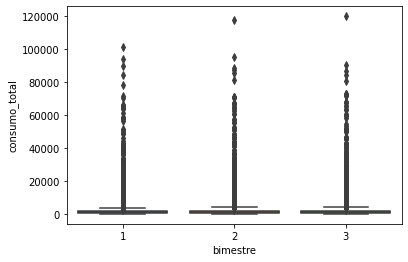

In [49]:
sns.boxplot(x='bimestre', y='consumo_total', data=df)

KeyError: False

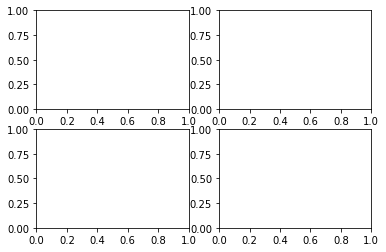

In [53]:
fig, axes = plt.subplots(2,2)

ax = sns.boxplot(x='alcaldia', y='consumo_total', data=df['bimestre' == '1'], orient='v', ax=axes[0,0])
ax = sns.boxplot(x='alcaldia', y='consumo_total', data=df['bimestre' == '2'], orient='v', ax=axes[0,1])
ax = sns.boxplot(x='alcaldia', y='consumo_total', data=df['bimestre' == '3'], orient='v', ax=axes[1,0])

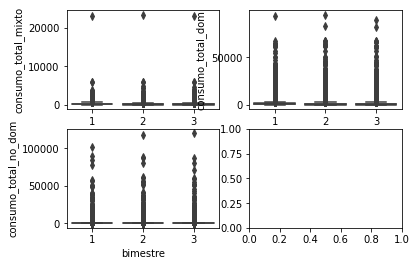

In [56]:
fig, axes = plt.subplots(2,2)

ax = sns.boxplot(x='bimestre', y='consumo_total_mixto', data=df, orient='v', ax=axes[0,0])
ax = sns.boxplot(x='bimestre', y='consumo_total_dom', data=df, orient='v', ax=axes[0,1])
ax = sns.boxplot(x='bimestre', y='consumo_total_no_dom', data=df, orient='v', ax=axes[1,0])

### Variables categóricas

/home/ltejadal/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'gustavo a. madero'),
 Text(1, 0, 'azcapotzalco'),
 Text(2, 0, 'coyoacan'),
 Text(3, 0, 'tlalpan'),
 Text(4, 0, 'milpa alta'),
 Text(5, 0, 'alvaro obregon'),
 Text(6, 0, 'cuajimalpa'),
 Text(7, 0, 'tlahuac'),
 Text(8, 0, 'magdalena contreras'),
 Text(9, 0, 'xochimilco'),
 Text(10, 0, 'iztapalapa'),
 Text(11, 0, 'iztacalco'),
 Text(12, 0, 'benito juarez'),
 Text(13, 0, 'miguel hidalgo'),
 Text(14, 0, 'cuauhtemoc'),
 Text(15, 0, 'venustiano carranza')]

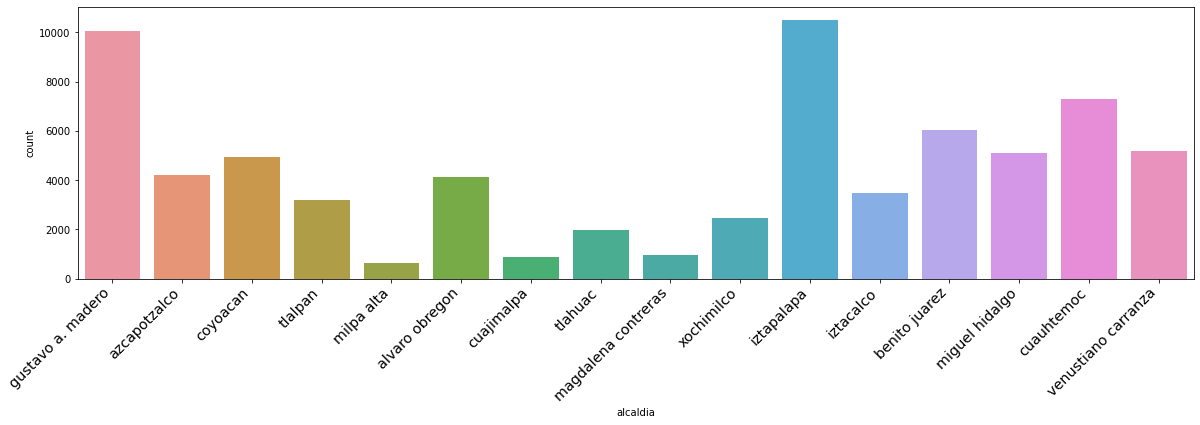

In [64]:
plt.figure(figsize=(20,5))
chart = sns.countplot(df['alcaldia'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='x-large')

In [ ]:
plt.figure(figsize=(20,5))
chart = sns.catplot(
    data = df[df['bimestre'].isin([1,2,3])],
    x='alcaldia',
    
    col='consumo_total',
    col_wrap=3,
    kind='count',
    aspect=3
)
chart.set_xticklabels(rotation=45, horizontalalignment='right', fontsize='x-large')